In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from prospect.utils.smoothing import smoothspec

%matplotlib inline

In [9]:
disp = Table.read('jwst_nirspec_prism_disp.fits')
disp # wavelength in microns

WAVELENGTH,DLDS,R
MICRONS,MICRONS/PIXEL,RESOLUTION
float32,float32,float32
0.5,0.00249827,90.9719
0.5055,0.00258177,88.998
0.511,0.00266687,87.0956
0.5165,0.00275357,85.2613
0.522,0.00284186,83.4921
0.5275,0.00293175,81.7849
0.533,0.00302323,80.1371
0.5385,0.0031163,78.5459


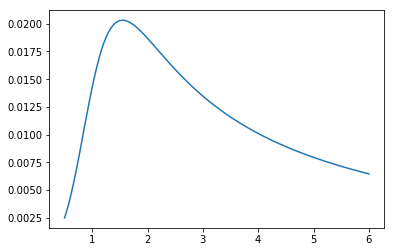

In [13]:
plt.plot(disp['WAVELENGTH'], disp['DLDS'])

In [14]:
outwave = disp['WAVELENGTH'].data

In [15]:
inwave, influx = np.loadtxt('modelspec_00.txt', unpack=True) # inwave in microns

In [16]:
resolution = np.interp(inwave, disp['WAVELENGTH'], disp['DLDS'])

(0.5, 6.0)

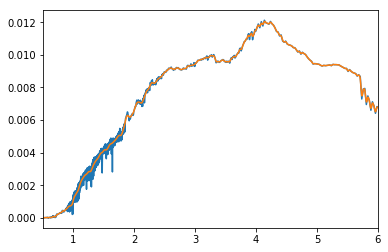

In [18]:
smoothflux = smoothspec(inwave, influx, resolution=resolution, smoothtype='lsf', 
                        outwave=outwave, fftsmooth=True)

plt.plot(inwave, influx)
plt.plot(outwave, smoothflux)
plt.xlim(outwave.min(), outwave.max())